# EDA and Packages

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler, RobustScaler

## Mount Drive and Import Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/araclab interview problem/'
raw_data = os.path.join(file_path, "data.xlsx")

raw_df = pd.read_excel(raw_data)

## Initial Review of Data

In [ ]:
raw_df.head(20)

,Shareable Sample Name,Total No. of Seqs in sample,CST1,CST2,CST3,CST4,CST5,CST6,CST7,COR,DOL,ENT,MRX,PRO,SAU,SEPI
0,GWU_1,4366,1,0,0,0,0,0,0,1,0,0,0,0,3956,64
1,GWU_2,2402,1,0,0,0,0,0,0,68,10,8,422,32,1336,90
2,GWU_3,1962,1,0,0,0,0,0,0,23,0,9,0,21,1404,262
3,GWU_4,1953,1,0,0,0,0,0,0,5,4,0,0,13,1365,307
4,GWU_5,4520,1,0,0,0,0,0,0,3,3,0,0,4,4182,11
5,GWU_6,2481,1,0,0,0,0,0,0,181,152,0,0,40,1752,67
6,GWU_7,354,1,0,0,0,0,0,0,44,4,0,46,39,154,13
7,GWU_8,4044,1,0,0,0,0,0,0,105,0,0,1,26,3005,68
8,GWU_9,3348,1,0,0,0,0,0,0,8,0,9,0,11,2704,132
9,GWU_10,2448,1,0,0,0,0,0,0,129,534,0,1,44,1167,96


In [ ]:
raw_df.shape

(178, 16)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Shareable Sample Name        178 non-null    object
 1   Total No. of Seqs in sample  178 non-null    int64 
 2   CST1                         178 non-null    int64 
 3   CST2                         178 non-null    int64 
 4   CST3                         178 non-null    int64 
 5   CST4                         178 non-null    int64 
 6   CST5                         178 non-null    int64 
 7   CST6                         178 non-null    int64 
 8   CST7                         178 non-null    int64 
 9   COR                          178 non-null    int64 
 10  DOL                          178 non-null    int64 
 11  ENT                          178 non-null    int64 
 12  MRX                          178 non-null    int64 
 13  PRO                          178 no

In [ ]:
raw_df.describe().applymap('{:,.2f}'.format)

,Total No. of Seqs in sample,CST1,CST2,CST3,CST4,CST5,CST6,CST7,COR,DOL,ENT,MRX,PRO,SAU,SEPI
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,"1,807.39",0.12,0.09,0.22,0.29,0.11,0.06,0.11,388.55,138.25,200.38,91.65,79.04,266.85,271.35
std,"1,045.72",0.33,0.29,0.42,0.45,0.32,0.23,0.31,617.95,271.60,588.57,238.03,117.01,697.13,400.86
min,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,296.75",0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,8.00,0.00,25.00
50%,"1,661.50",0.00,0.00,0.00,0.00,0.00,0.00,0.00,143.00,6.00,2.00,0.00,34.00,2.00,115.00
75%,"2,115.75",0.00,0.00,0.00,1.00,0.00,0.00,0.00,540.75,150.25,27.75,14.00,94.25,21.00,327.00
max,"7,106.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,"4,910.00","1,774.00","4,816.00","1,579.00",684.00,"4,182.00","3,452.00"


In [ ]:
missing_data = pd.concat([raw_df.isnull().sum(), 100 * raw_df.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Shareable Sample Name,0,0.0
Total No. of Seqs in sample,0,0.0
CST1,0,0.0
CST2,0,0.0
CST3,0,0.0
CST4,0,0.0
CST5,0,0.0
CST6,0,0.0
CST7,0,0.0
COR,0,0.0


## EDA on Whole Data

In [ ]:
raw_df.columns

Index(['Shareable Sample Name', 'Total No. of Seqs in sample', 'CST1', 'CST2',
       'CST3', 'CST4', 'CST5', 'CST6', 'CST7', 'COR', 'DOL', 'ENT', 'MRX',
       'PRO', 'SAU', 'SEPI'],
      dtype='object')

In [ ]:
simple_df = raw_df.drop(["Shareable Sample Name", "CST1", "CST2", "CST3", "CST4", "CST5", "CST6", "CST7"], axis=1)
simple_df.head(20)

,Total No. of Seqs in sample,COR,DOL,ENT,MRX,PRO,SAU,SEPI
0,4366,1,0,0,0,0,3956,64
1,2402,68,10,8,422,32,1336,90
2,1962,23,0,9,0,21,1404,262
3,1953,5,4,0,0,13,1365,307
4,4520,3,3,0,0,4,4182,11
5,2481,181,152,0,0,40,1752,67
6,354,44,4,0,46,39,154,13
7,4044,105,0,0,1,26,3005,68
8,3348,8,0,9,0,11,2704,132
9,2448,129,534,0,1,44,1167,96


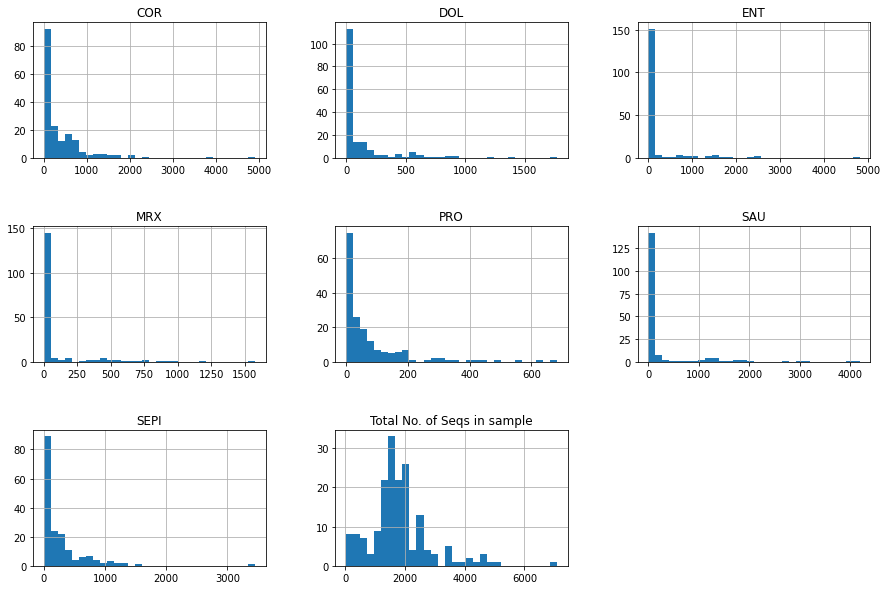

In [ ]:
simple_df.hist(figsize=(15,10), bins=30)
plt.subplots_adjust(hspace=0.5);
plt.show()

In [ ]:
print("feature |", "Skewness")
for col in simple_df.columns:
  print(col, skew(simple_df[col]))

feature | Skewness
Total No. of Seqs in sample 1.4017596404493577
COR 3.7887130974099157
DOL 2.9657125351074574
ENT 4.3215090691711335
MRX 3.3248176525705904
PRO 2.668058502939298
SAU 3.337262903372747
SEPI 3.64961596032243


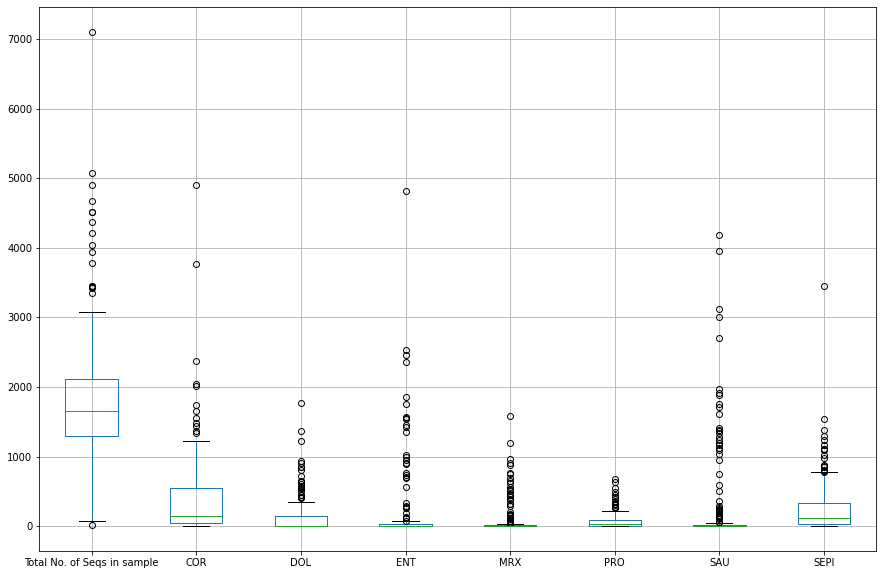

In [ ]:
simple_df.boxplot(figsize=(15,10))
plt.show()

In [ ]:
simple_df.describe().applymap('{:,.2f}'.format)

,Total No. of Seqs in sample,COR,DOL,ENT,MRX,PRO,SAU,SEPI
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,"1,807.39",388.55,138.25,200.38,91.65,79.04,266.85,271.35
std,"1,045.72",617.95,271.60,588.57,238.03,117.01,697.13,400.86
min,19.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,296.75",38.00,0.00,0.00,0.00,8.00,0.00,25.00
50%,"1,661.50",143.00,6.00,2.00,0.00,34.00,2.00,115.00
75%,"2,115.75",540.75,150.25,27.75,14.00,94.25,21.00,327.00
max,"7,106.00","4,910.00","1,774.00","4,816.00","1,579.00",684.00,"4,182.00","3,452.00"


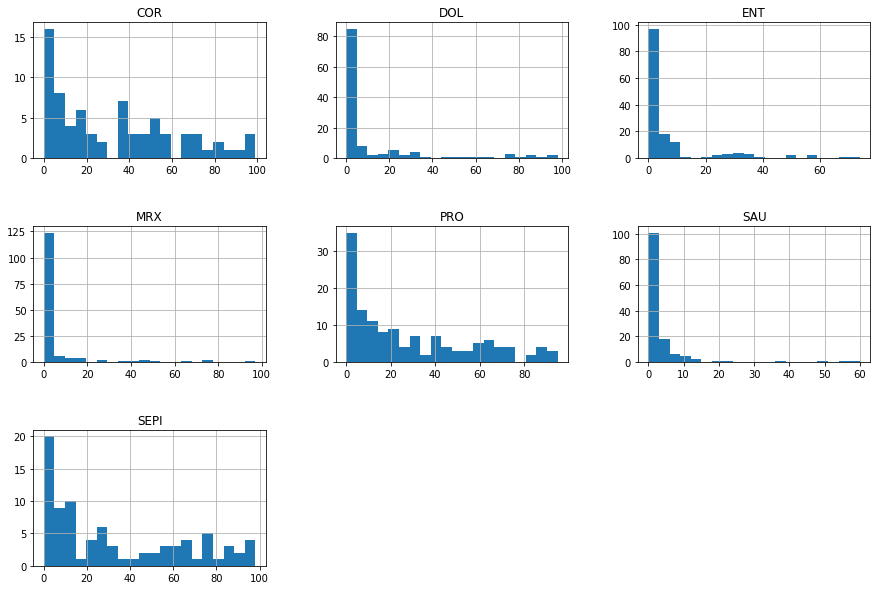

In [ ]:
simple_df.drop(["Total No. of Seqs in sample"], axis=1)[simple_df < 100].hist(figsize=(15,10), bins=20)
plt.subplots_adjust(hspace=0.5);
plt.show()

In [ ]:
geneList = ["COR", "DOL", "ENT", "MRX", "PRO", "SAU", "SEPI"]
print("gene |", "zero_count |", "percent of total")
for gene in geneList:
  zero_count = (simple_df[gene] == 0).sum()
  zero_percent = round((zero_count / len(simple_df[gene])) * 100)
  print(gene, zero_count, zero_percent, "%")

gene | zero_count | percent of total
COR 3 2 %
DOL 61 34 %
ENT 68 38 %
MRX 92 52 %
PRO 14 8 %
SAU 67 38 %
SEPI 6 3 %


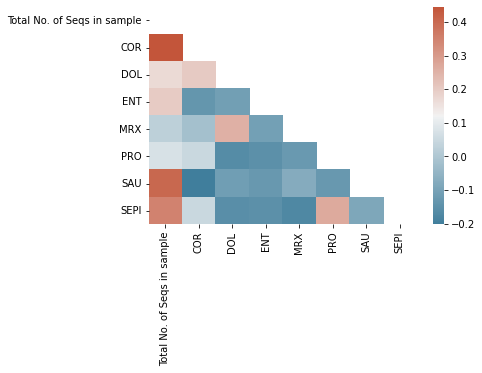

In [ ]:
mask = np.triu(np.ones_like(simple_df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(simple_df.corr(), mask=mask, cmap=cmap)
plt.show()

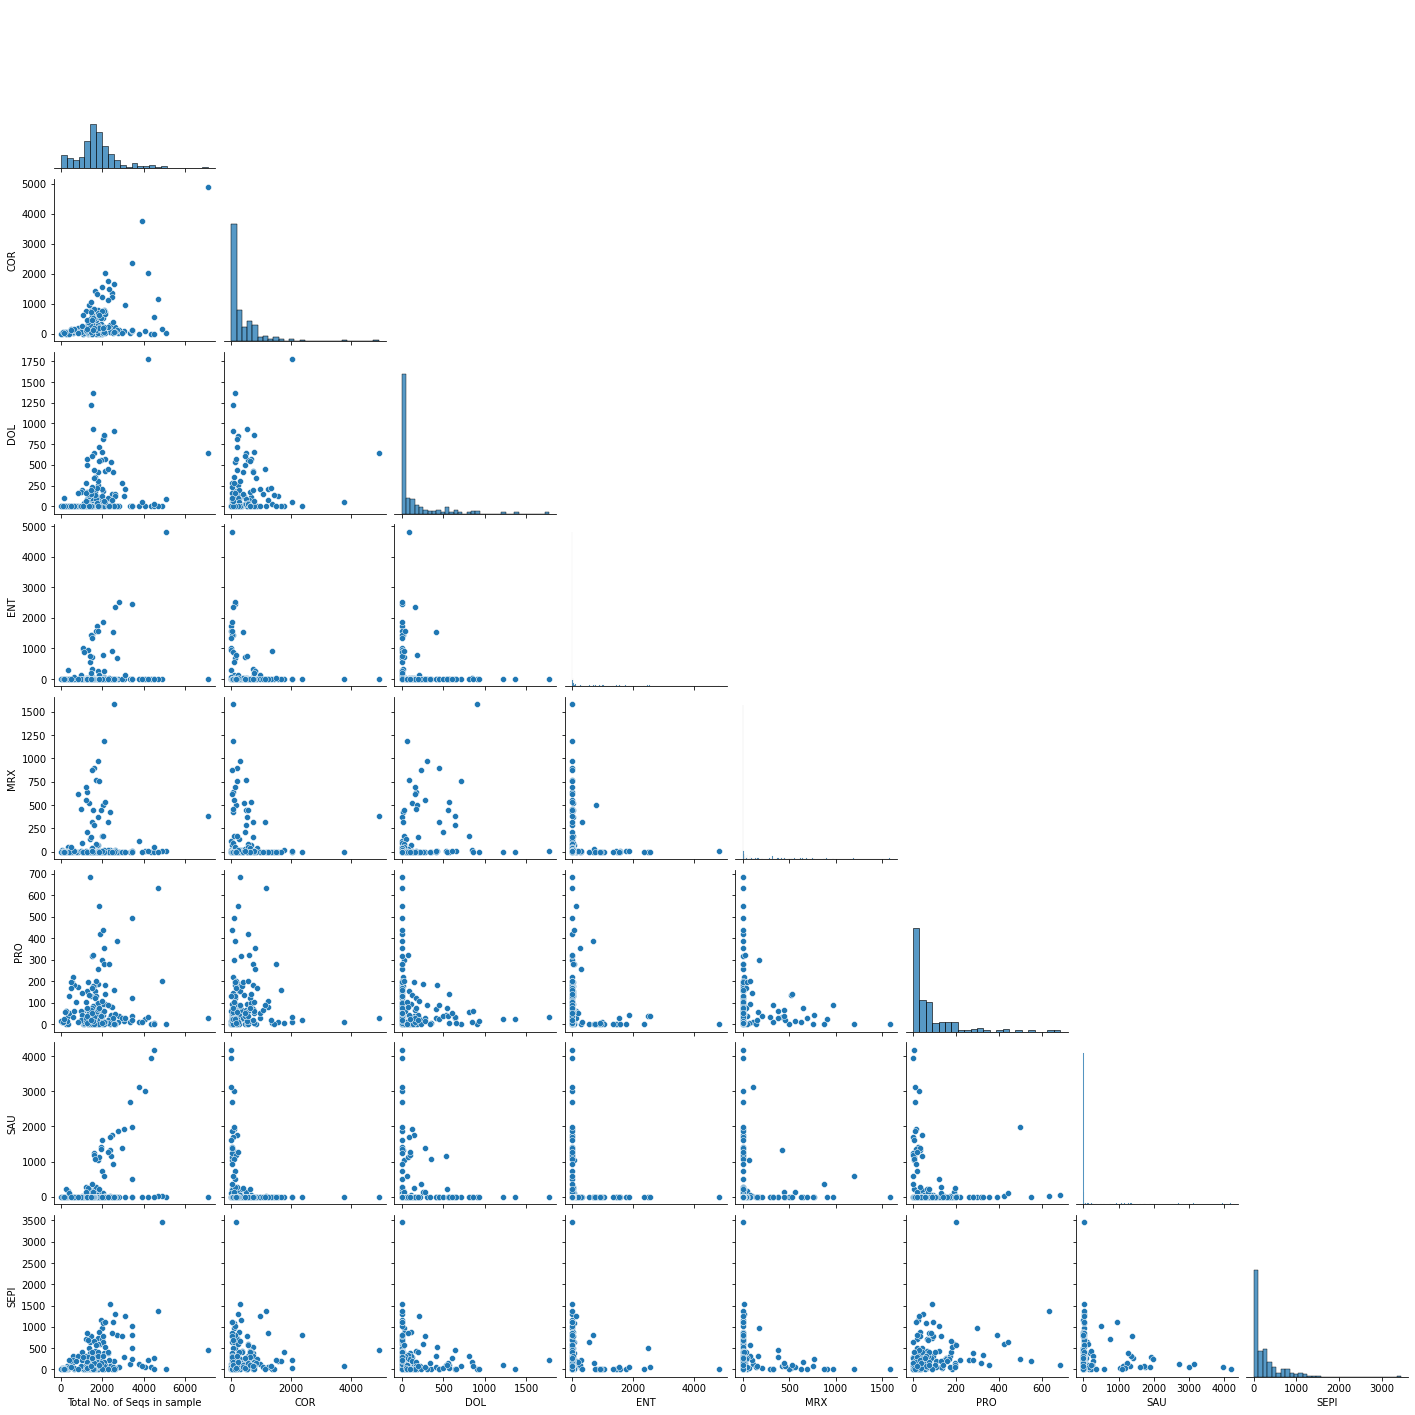

In [ ]:
sns.pairplot(simple_df, corner=True)
plt.show()

### Log Data Transformation

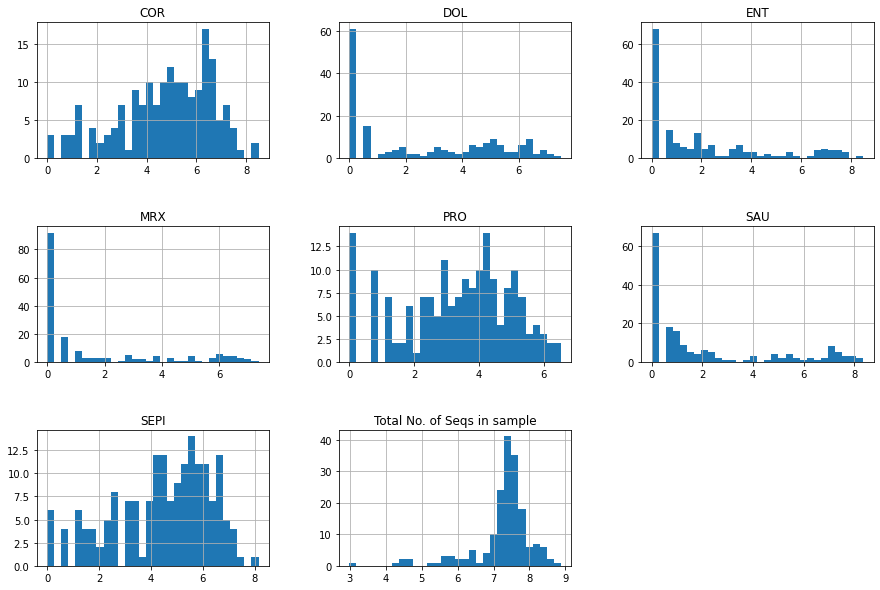

In [ ]:
simple_log_df = np.log(simple_df+1)
simple_log_df.hist(figsize=(15,10), bins=30)
plt.subplots_adjust(hspace=0.5);
plt.show()

In [576]:
print("feature |", "Skewness")
for col in simple_log_df.columns:
  print(col, skew(simple_log_df[col]))

feature | Skewness
Total No. of Seqs in sample -2.065245249423395
COR -0.5733218744064065
DOL 0.31399018984082766
ENT 1.1155079379616037
MRX 1.2204604309014933
PRO -0.38913924319214677
SAU 1.1183575359335856
SEPI -0.6196762205043613


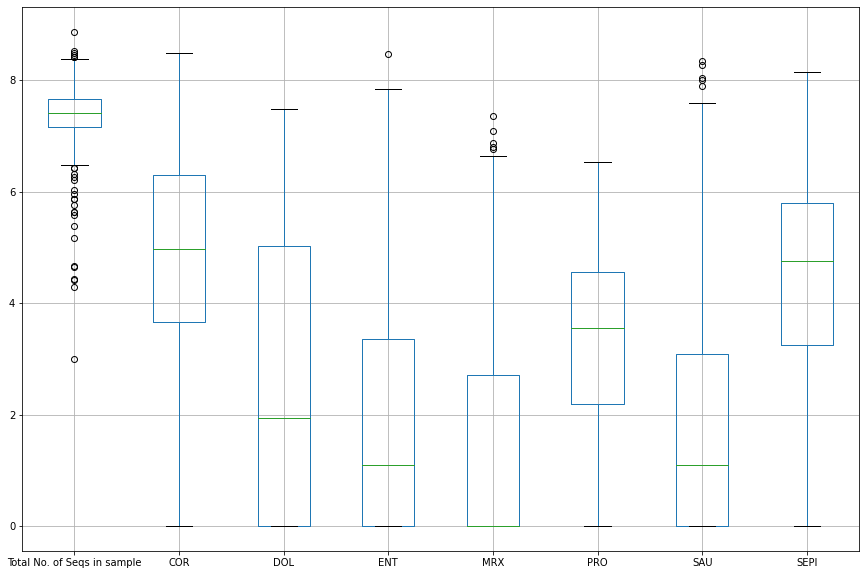

In [ ]:
simple_log_df.boxplot(figsize=(15,10))
plt.show()

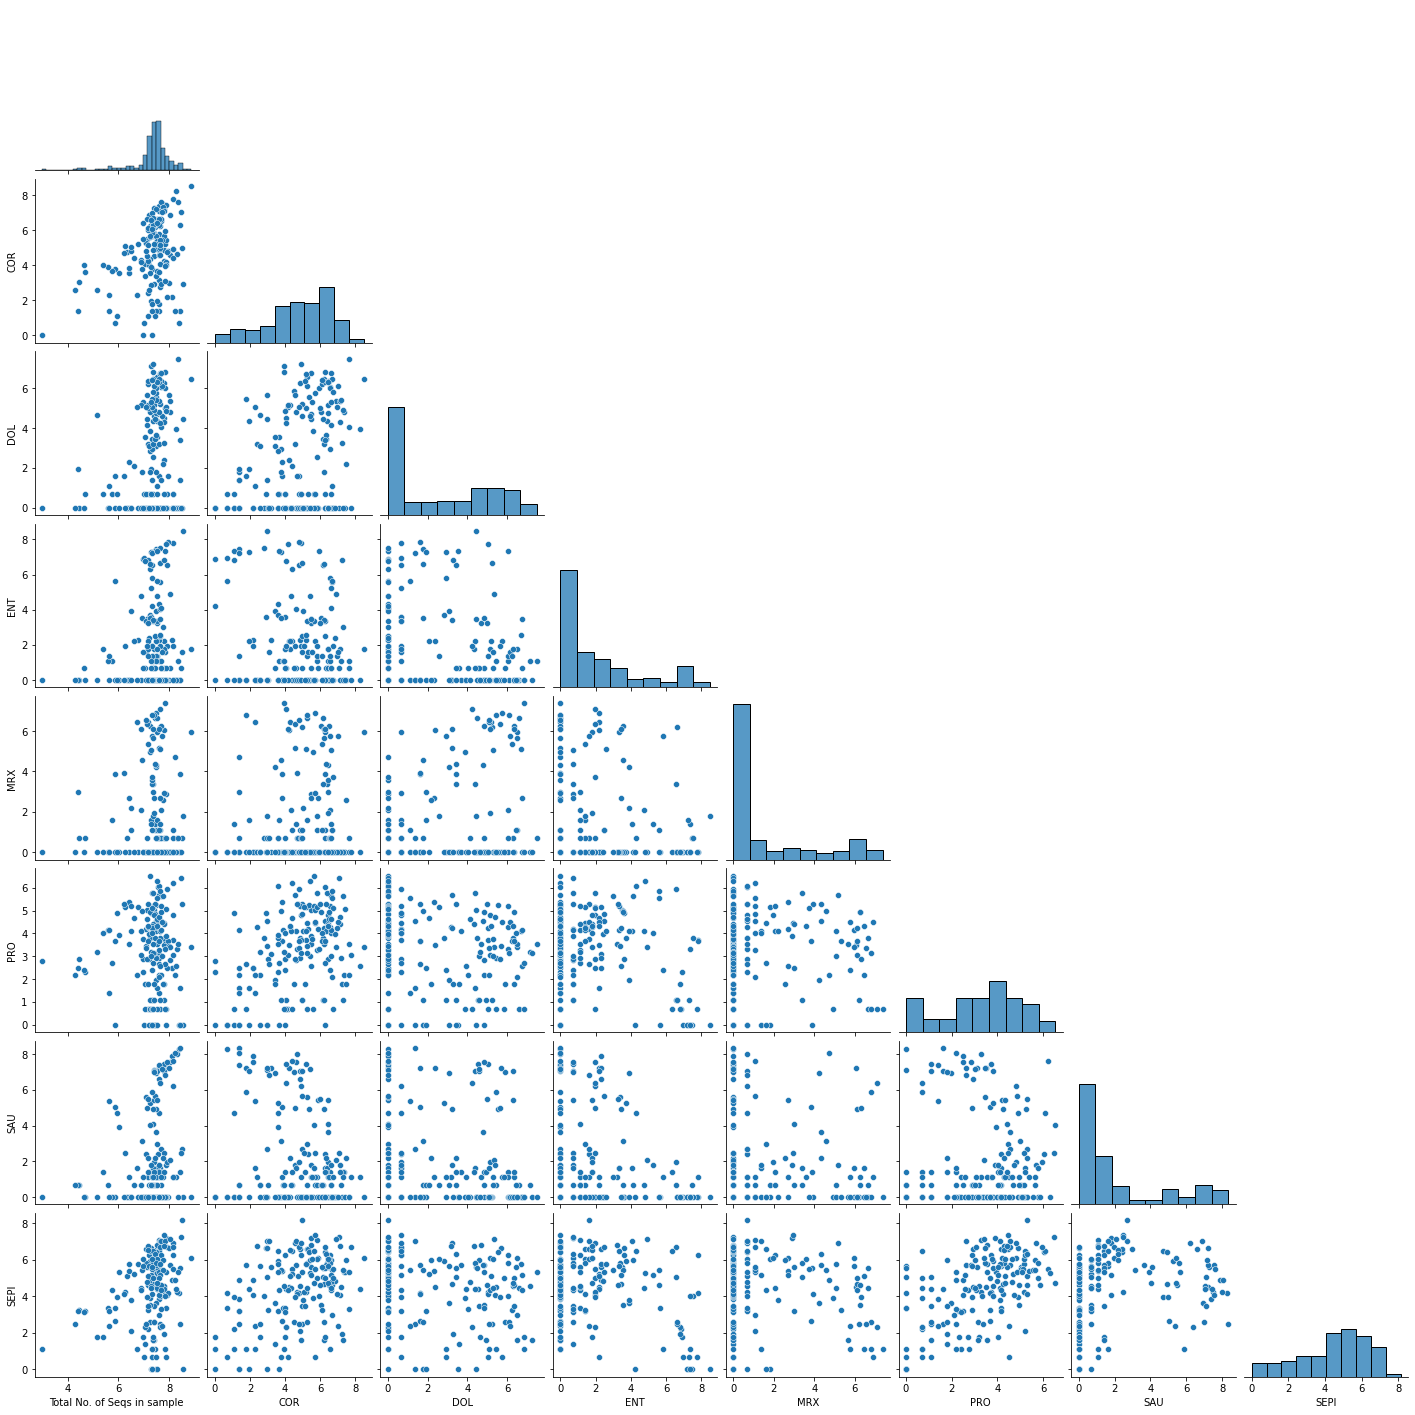

In [ ]:
sns.pairplot(simple_log_df, corner=True)
plt.show()

## Normalizing Data to Consider

There are a few popular ways to normalize data for features to be comparable with one another as well as have similar impact on the modeling that is provided by scikit-learn. There is StandardScaler, MinMaxScaler, and RobustScaler. These different feature scaling can be tested and picked for the best one on the dataset.

In [ ]:
# StandardScaler
std_scalar = StandardScaler()
std_data = std_scalar.fit_transform(simple_df)
std_df = pd.DataFrame(std_data, columns=simple_df.columns)

# MinMaxScaler
minmax_scalar = MinMaxScaler()
minmax_data = minmax_scalar.fit_transform(simple_df)
minmax_df = pd.DataFrame(minmax_data, columns=simple_df.columns)

# RobustScaler
robust_scalar = RobustScaler()
robust_data = robust_scalar.fit_transform(simple_df)
robust_df = pd.DataFrame(robust_data, columns=simple_df.columns)

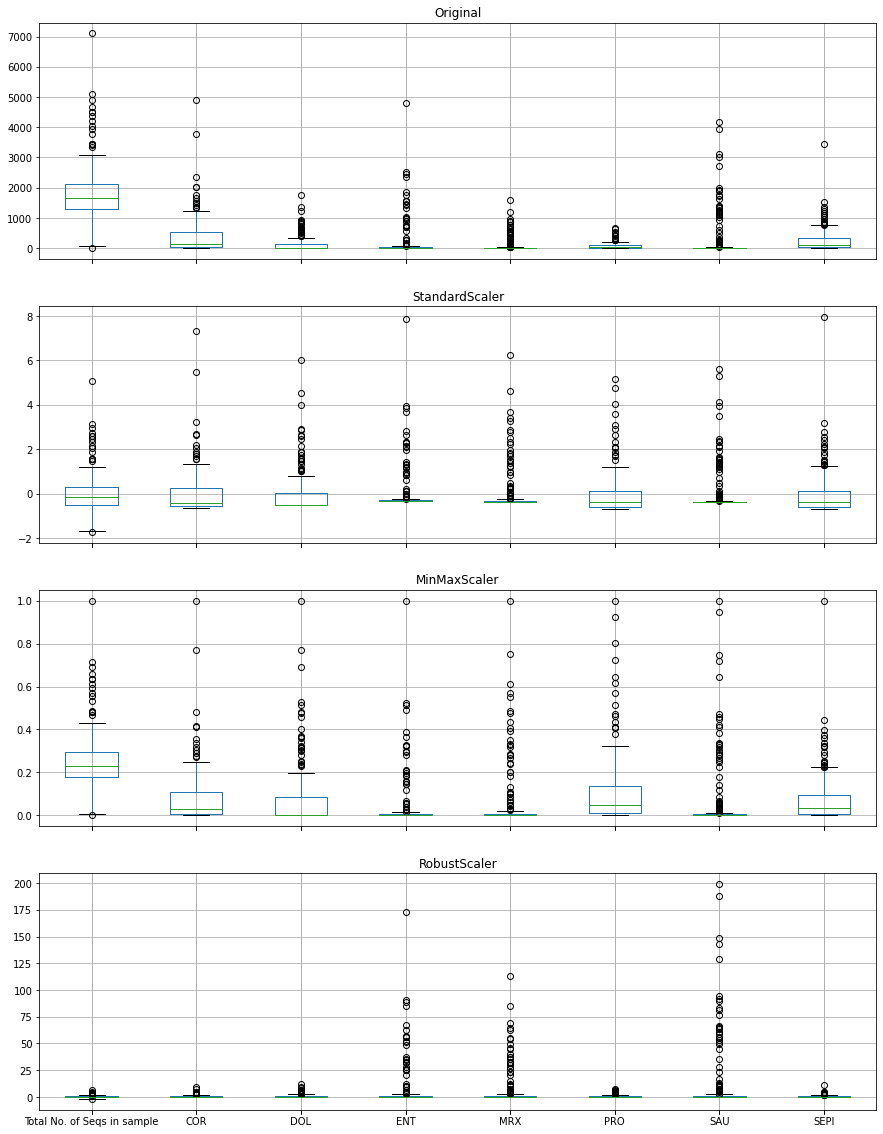

In [ ]:
fig, ax = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(15,20)

simple_df.boxplot(ax=ax[0])
ax[0].set_title("Original")

std_df.boxplot(ax=ax[1])
ax[1].set_title("StandardScaler")

minmax_df.boxplot(ax=ax[2])
ax[2].set_title("MinMaxScaler")

robust_df.boxplot(ax=ax[3])
ax[3].set_title("RobustScaler")

plt.show()

## EDA on Cluster Data

In [ ]:
clusterList = ["CST1", "CST2", "CST3", "CST4", "CST5", "CST6", "CST7"]
cstID_list = [cst for i in range(len(raw_df)) for cst in clusterList if raw_df[cst][i] == 1]

In [ ]:
cluster_df = simple_df
cluster_df["cstID"] =  cstID_list

cluster_df.head(25)

,Total No. of Seqs in sample,COR,DOL,ENT,MRX,PRO,SAU,SEPI,cstID
0,4366,1,0,0,0,0,3956,64,CST1
1,2402,68,10,8,422,32,1336,90,CST1
2,1962,23,0,9,0,21,1404,262,CST1
3,1953,5,4,0,0,13,1365,307,CST1
4,4520,3,3,0,0,4,4182,11,CST1
5,2481,181,152,0,0,40,1752,67,CST1
6,354,44,4,0,46,39,154,13,CST1
7,4044,105,0,0,1,26,3005,68,CST1
8,3348,8,0,9,0,11,2704,132,CST1
9,2448,129,534,0,1,44,1167,96,CST1


cstID | Count
CST1    22
CST2    16
CST3    40
CST4    51
CST5    20
CST6    10
CST7    19
Name: cstID, dtype: int64


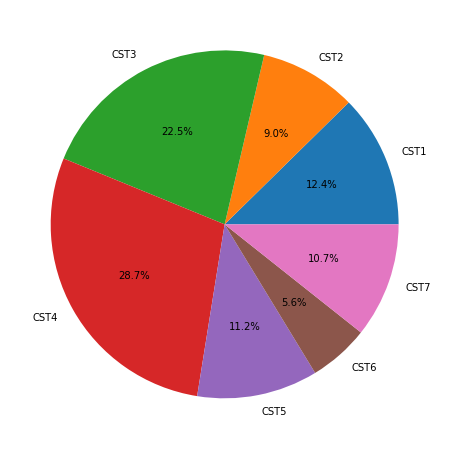

In [ ]:
cst_counts = cluster_df.cstID.value_counts().sort_index()
print("cstID |", "Count")
print(cst_counts)

plt.figure(figsize=(8,8))
mylab = cst_counts.index

plt.pie(cst_counts, labels=mylab, autopct='%1.1f%%')
plt.show()

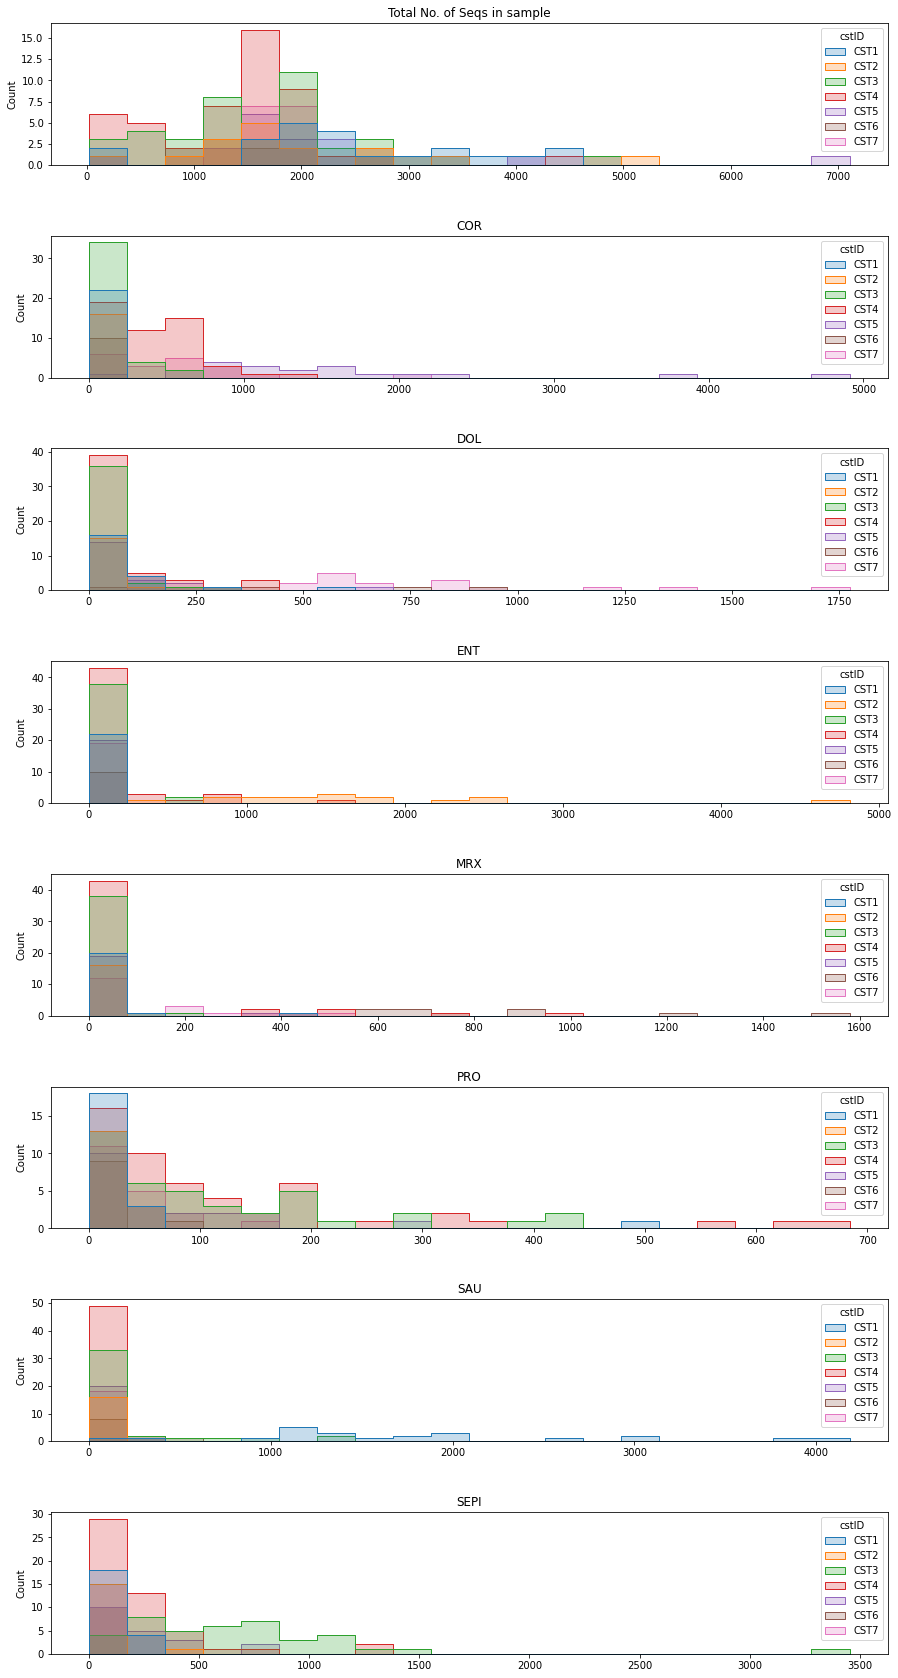

In [ ]:
cols = cluster_df.drop(["cstID"],axis=1).columns

fig, ax = plt.subplots(len(cols), figsize = (15,30))

for i, col in enumerate(cols):
  sns.histplot(x=col,
               data=cluster_df,
               hue="cstID",
               ax=ax[i],
               element="step",
               bins=20)
  ax[i].set_title(col)
  ax[i].set_xlabel(None)

plt.subplots_adjust(hspace = 0.5)
plt.show()

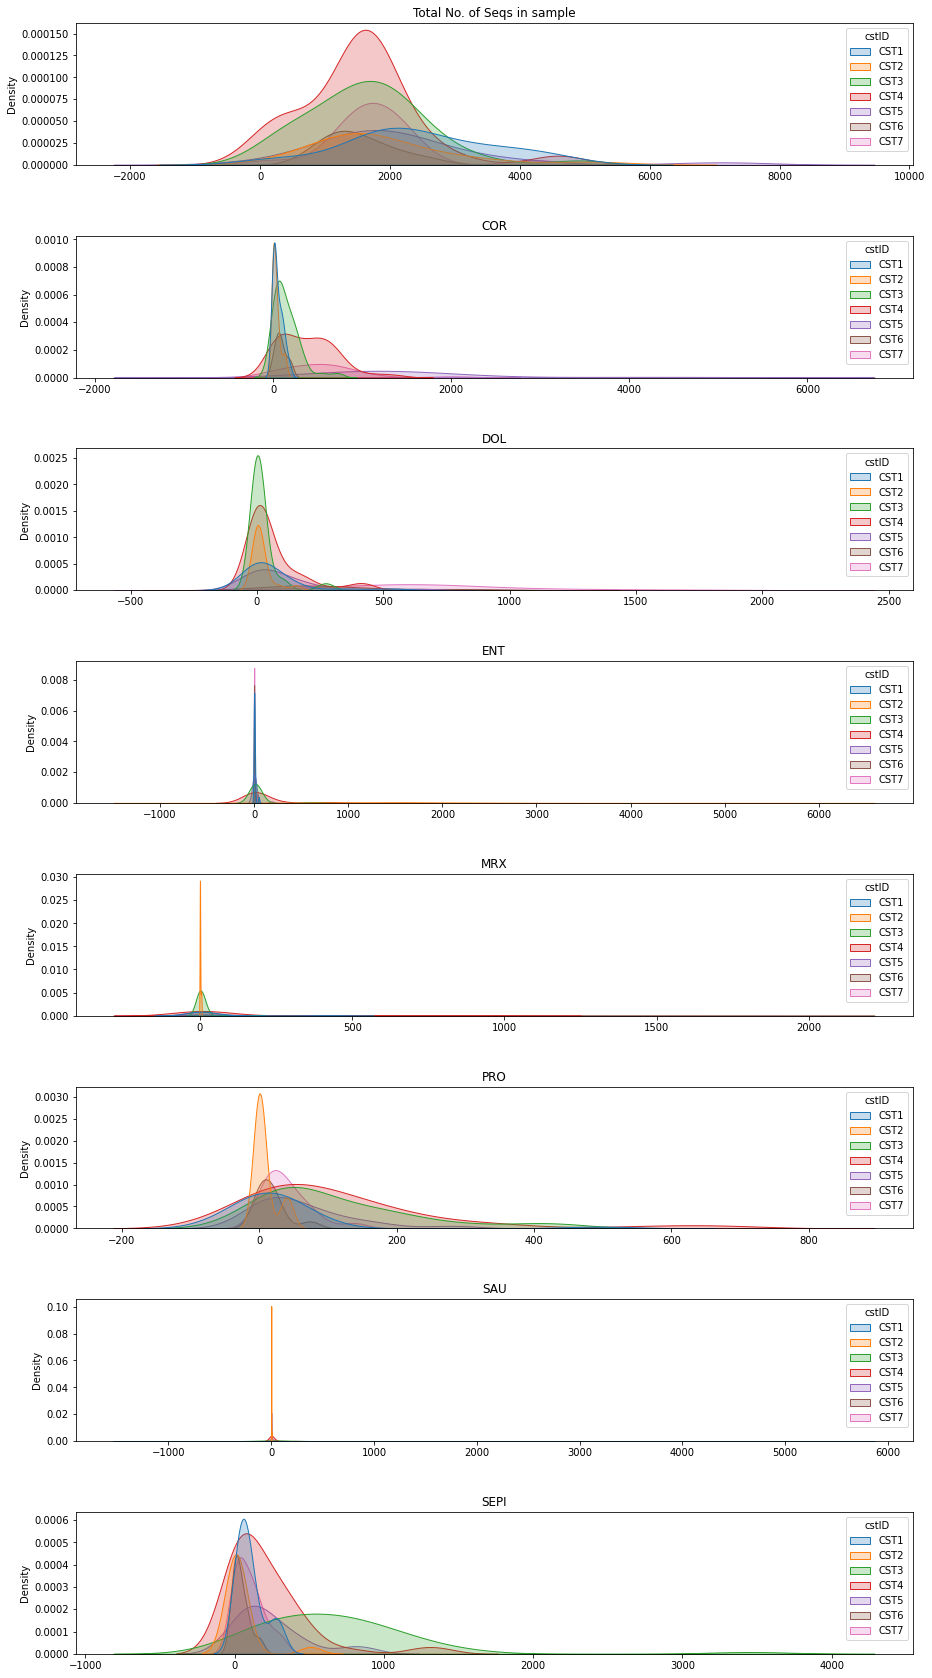

In [ ]:
cols = cluster_df.drop(["cstID"],axis=1).columns

fig, ax = plt.subplots(len(cols), figsize = (15,30))

for i, col in enumerate(cols):
  sns.kdeplot(x=col,
              data=cluster_df,
              hue="cstID",
              fill=True,
              ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xlabel(None)

plt.subplots_adjust(hspace = 0.5)
plt.show()

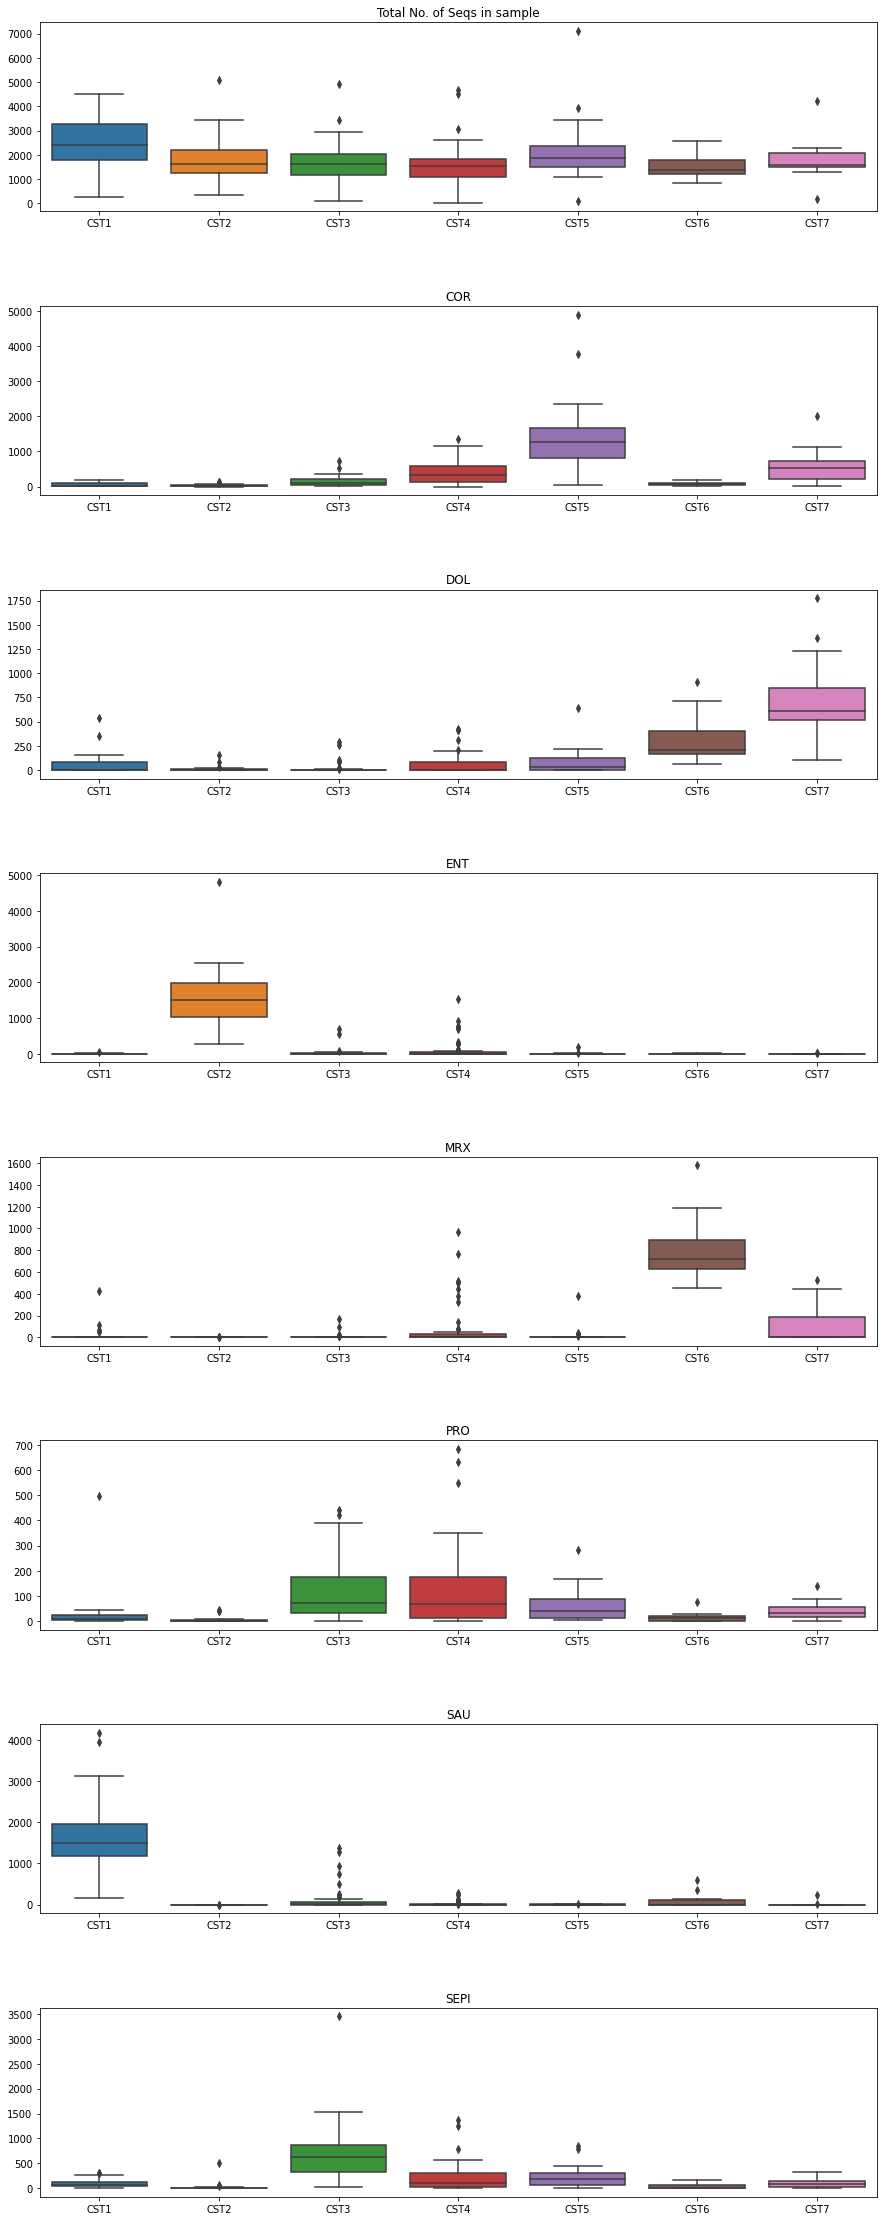

In [ ]:
cols = cluster_df.drop(["cstID"],axis=1).columns

fig, ax = plt.subplots(len(cols), figsize = (15,40))

for i, col in enumerate(cols):
  sns.boxplot(x="cstID",
              y=col,
              data=cluster_df,
              ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xlabel(None)
  ax[i].set_ylabel(None)

plt.subplots_adjust(hspace = 0.5)
plt.show()

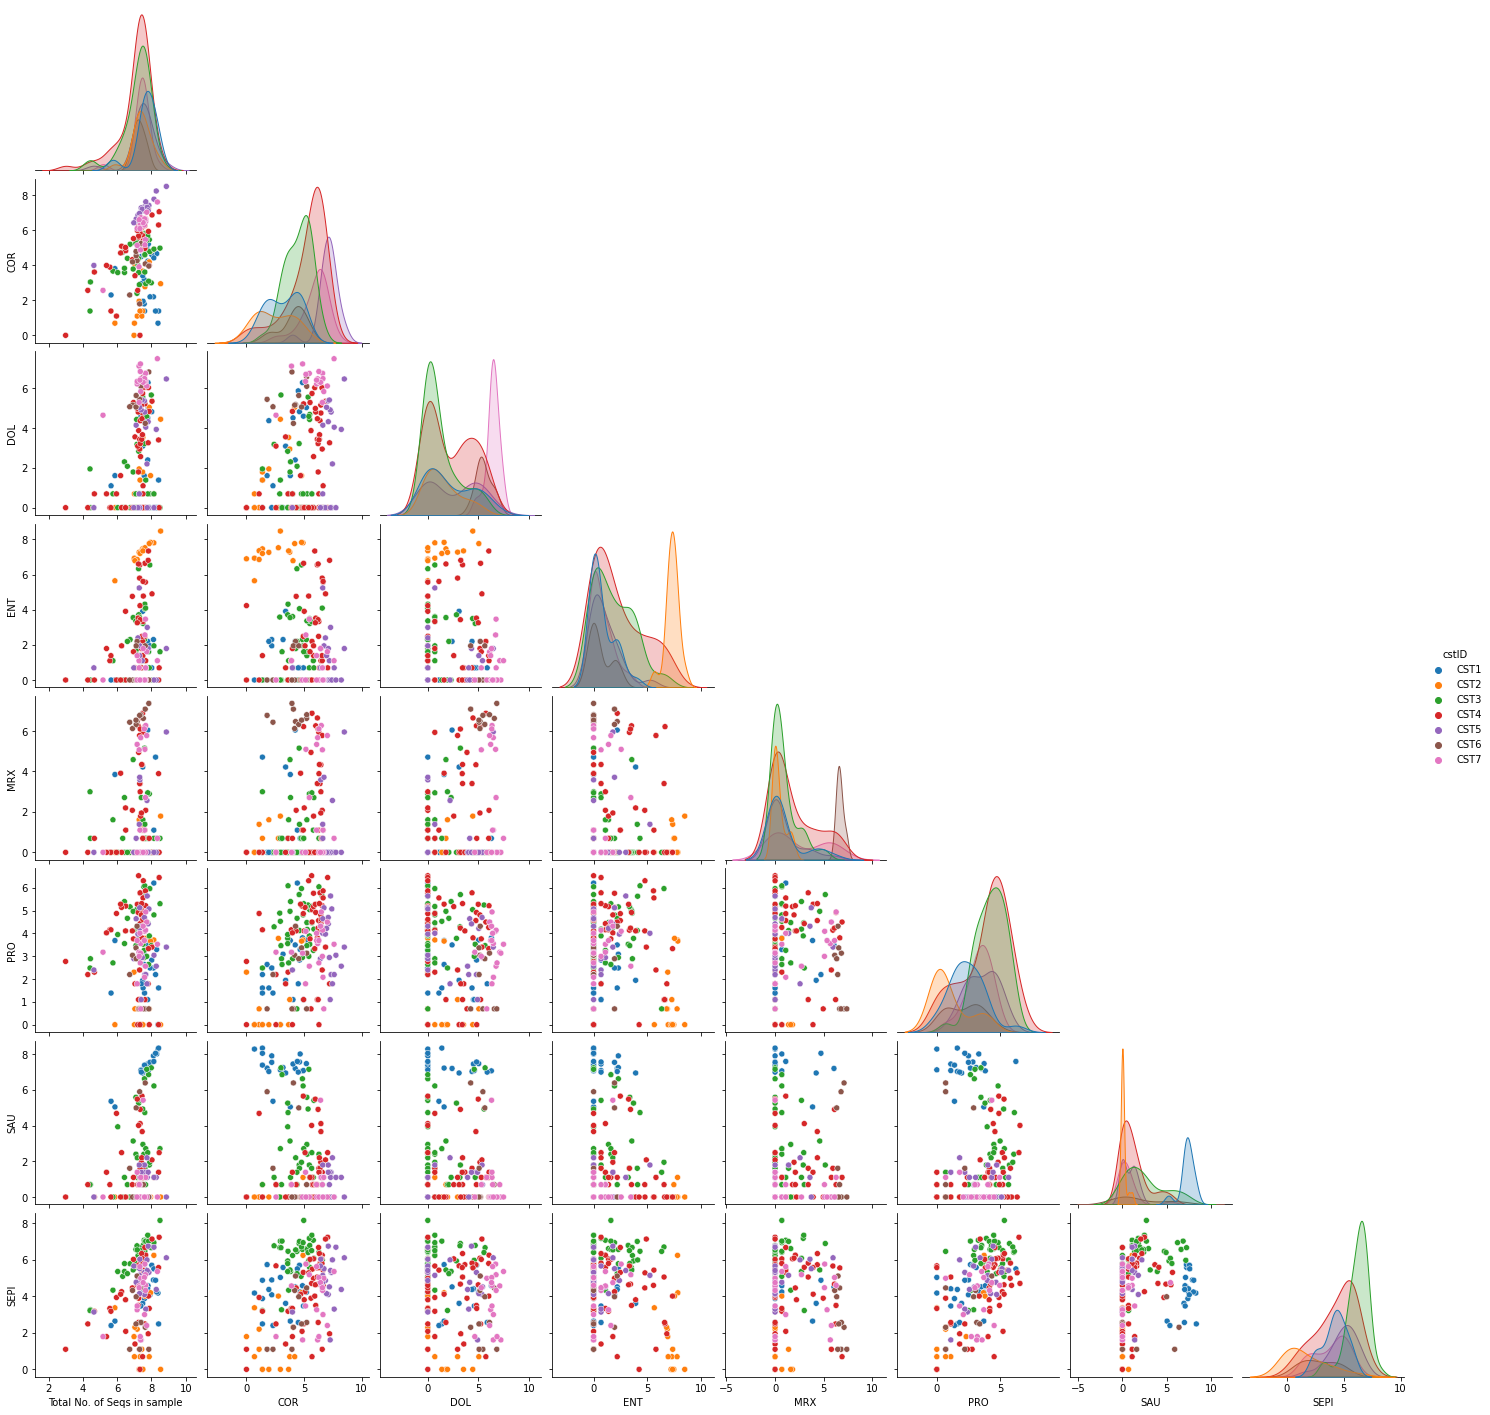

In [ ]:
temp_df = cluster_df.drop(["cstID"], axis=1)
temp_df = np.log(temp_df+1)
temp_df["cstID"] = cluster_df["cstID"]

sns.pairplot(temp_df, hue="cstID", corner=True)

# Preprocessing and Modeling

## Modeling Packages

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## Split Data and Modeling Evaluations

In [ ]:
seed = 123

# Split data into feature X and target y
X = cluster_df.drop(["cstID"], axis=1)
y = cluster_df.cstID

# Label encode target y
le = LabelEncoder()
encoded_y = le.fit_transform(y)

# Train Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.20, random_state=seed)

In [583]:
X_train.shape

(142, 8)

In [584]:
y_train.shape

(142,)

In [585]:
X_test.shape

(36, 8)

In [586]:
y_test.shape

(36,)

### Baseline Lazypredict Modeling

In [ ]:
# Baseline Modeling
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = lazy_clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 18.63it/s]


In [ ]:
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.83,0.89,None,0.83,0.04
SGDClassifier,0.81,0.86,None,0.80,0.02
LabelSpreading,0.81,0.86,None,0.80,0.05
PassiveAggressiveClassifier,0.78,0.84,None,0.78,0.03
LabelPropagation,0.78,0.84,None,0.78,0.04
LinearSVC,0.78,0.83,None,0.77,0.03
ExtraTreeClassifier,0.78,0.83,None,0.79,0.02
Perceptron,0.75,0.81,None,0.74,0.03
RidgeClassifierCV,0.75,0.81,None,0.75,0.01


[(0.0, 1.0)]

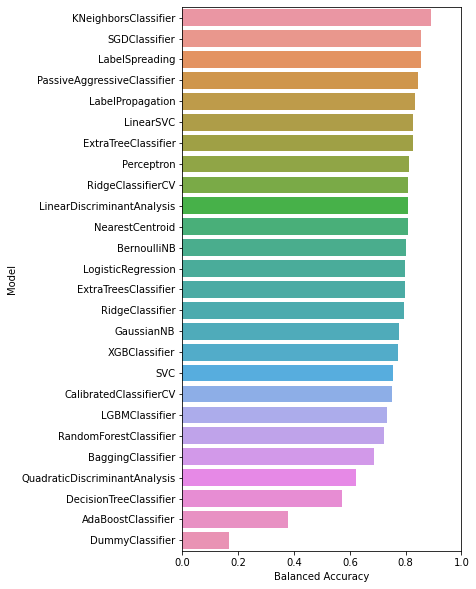

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(y=train.index, x="Balanced Accuracy", data=train)
ax.set(xlim=(0,1))

[(0.0, 1.0)]

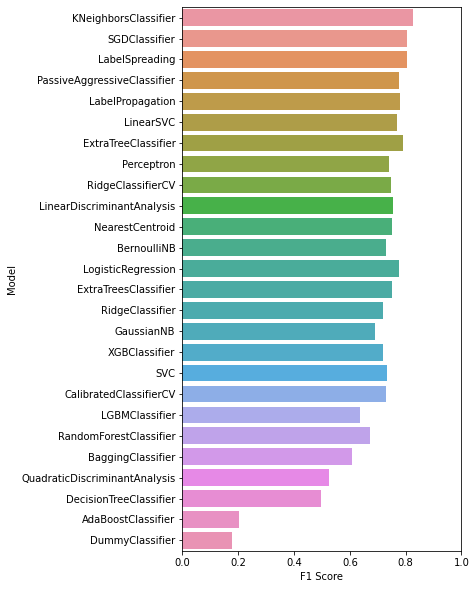

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(y=train.index, x="F1 Score", data=train)
ax.set(xlim=(0,1))

### Pre-processing Power Transformation Modeling

In [ ]:
# Given how the original data is skewed, evaluate pre-processing transformation
yjpt = PowerTransformer(method="yeo-johnson")
yjpt_X_train = yjpt.fit_transform(X_train)
yjpt_X_test = yjpt.transform(X_test)

lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = lazy_clf.fit(yjpt_X_train, yjpt_X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 28.65it/s]


In [ ]:
# yeo-johnson
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.72,0.77,None,0.72,0.06
LogisticRegression,0.69,0.77,None,0.70,0.04
LinearSVC,0.69,0.76,None,0.70,0.02
LGBMClassifier,0.64,0.73,None,0.64,0.10
SGDClassifier,0.64,0.73,None,0.62,0.02
NearestCentroid,0.61,0.72,None,0.59,0.02
ExtraTreesClassifier,0.64,0.72,None,0.65,0.12
GaussianNB,0.61,0.71,None,0.60,0.02
RandomForestClassifier,0.64,0.71,None,0.64,0.17


In [ ]:
# Plus 1 is added since box-cox cannot handle 0 value.
bcpt = PowerTransformer(method="box-cox")
bcpt_X_train = bcpt.fit_transform(X_train+1)
bcpt_X_test = bcpt.transform(X_test+1)

lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = lazy_clf.fit(bcpt_X_train, bcpt_X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 28.57it/s]


In [ ]:
# box-cox
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.72,0.77,None,0.72,0.06
LogisticRegression,0.69,0.77,None,0.70,0.04
LinearSVC,0.69,0.76,None,0.70,0.02
LGBMClassifier,0.64,0.73,None,0.64,0.09
SGDClassifier,0.64,0.73,None,0.62,0.02
NearestCentroid,0.61,0.72,None,0.59,0.02
ExtraTreesClassifier,0.64,0.72,None,0.65,0.13
GaussianNB,0.61,0.71,None,0.60,0.01
RandomForestClassifier,0.64,0.71,None,0.64,0.17


### Preprocessing and Building Pipeline

Using SGDClassifier and evaluating the different preprocessing scalers


In [ ]:
# StandardScaler
pipe = Pipeline(steps=[("standardscaler", StandardScaler()),
                       ("sgd_clf", SGDClassifier(random_state=seed))])

scores = cross_val_score(pipe, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 60.         100.          73.33333333  73.33333333  73.33333333
  66.66666667 100.          72.         100.          72.
  80.         100.          86.66666667 100.          72.
  80.          30.          73.33333333  86.66666667  80.
 100.          46.66666667  25.          50.         100.
 100.          66.66666667 100.         100.         100.        ]
Mean: 78.92222222222222
Standard Deviation: 0.20908917702888707


In [ ]:
# MinMaxScaler
pipe = Pipeline(steps=[("minmaxscaler", MinMaxScaler()),
                       ("sgd_clf", SGDClassifier(random_state=seed))])

scores = cross_val_score(pipe, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 73.33333333  28.          73.33333333  50.          53.33333333
  80.         100.          80.          73.33333333  53.33333333
  80.         100.          86.66666667  53.33333333  72.
  60.          72.          28.          20.          40.
  72.          30.          66.66666667  66.66666667  75.
  66.66666667  37.5         66.66666667  66.66666667  66.66666667]
Mean: 63.0388888888889
Standard Deviation: 0.19982199640408357


In [ ]:
# RobustScaler
pipe = Pipeline(steps=[("robustscaler", RobustScaler()),
                       ("sgd_clf", SGDClassifier(random_state=seed))])

scores = cross_val_score(pipe, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 73.33333333 100.         100.          46.66666667  73.33333333
   0.          60.          46.66666667  60.          20.
  40.         100.          60.          56.66666667  33.33333333
  53.33333333  33.33333333  46.66666667  60.          36.
  40.          53.33333333  41.66666667  25.          50.
  50.          41.66666667 100.          66.66666667  41.66666667]
Mean: 53.64444444444445
Standard Deviation: 0.2356062838458565


Class Imbalance Consideration with SGDClassifier

In [ ]:
# No SGDClassifier Class Weight
pipe = Pipeline(steps=[("standardscaler", StandardScaler()),
                       ("sgd_clf", SGDClassifier(class_weight=None, random_state=seed))])

scores = cross_val_score(pipe, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 60.         100.          73.33333333  73.33333333  73.33333333
  66.66666667 100.          72.         100.          72.
  80.         100.          86.66666667 100.          72.
  80.          30.          73.33333333  86.66666667  80.
 100.          46.66666667  25.          50.         100.
 100.          66.66666667 100.         100.         100.        ]
Mean: 78.92222222222222
Standard Deviation: 0.20908917702888707


In [ ]:
# Yes SGDClassifier Class Weight set to Balanced
pipe = Pipeline(steps=[("standardscaler", StandardScaler()),
                       ("sgd_clf", SGDClassifier(class_weight="balanced", random_state=seed))])

scores = cross_val_score(pipe, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 73.33333333 100.         100.         100.          45.33333333
  60.         100.          72.         100.          72.
  72.         100.          86.66666667 100.          72.
  80.          72.          73.33333333  40.          86.66666667
 100.          73.33333333  25.          50.         100.
  75.          66.66666667 100.         100.         100.        ]
Mean: 79.84444444444445
Standard Deviation: 0.20551603223635098


### Hyperparameter Tuning

In [ ]:
def grid_search_eval(estimator, hype_params):
    
    """
    Function performs GridSearchCV on inputted hyper parameters.
    After models are created, the mean score and standard deviation of each iteration is stored.
    The model is graphed against F1_weighted score.
    The top 5 models are listed with their scores and iteration number for identification
    Best parameters and best score are printed too.
    """
    
    # Grid Search with CV of the hyper parameters
    grid_search = GridSearchCV(
        n_jobs=-1,
        estimator=estimator,
        param_grid=hype_params,
        scoring = 'f1_weighted',
        cv = 30,
        verbose=10
    )
    
    # Fit and CV models with hyper parameters
    grid_search.fit(X_train, y_train)
    
    # Mean and Standard Deviation from iteration
    mean_score = list(grid_search.cv_results_['mean_test_score'])
    stds_score = list(grid_search.cv_results_['std_test_score'])
    
    # Graphs each iteration and its F1_Weighted score
    plt.subplots(figsize=(20, 5))
    plt.errorbar(list(range(0,len(mean_score))), mean_score, yerr=stds_score)
    plt.title("Grid_Search Iteration vs F1_Weighted Score")
    plt.xlabel("Iteration")
    plt.ylabel("F1_Weighted score")
    plt.show()
    
    # Prints the top 5 scores with iteration number
    print(sorted(list(enumerate(mean_score)), key=lambda x: x[1], reverse=True)[0:5])
    
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    
    return(grid_search)

In [ ]:
# Base model with weighted class for the imbalance data set to tune
pipe_tuning = Pipeline(steps=[("standardscaler", StandardScaler()),
                              ("sgd_clf", SGDClassifier(class_weight="balanced", random_state=seed))])

In [ ]:
# Set Hyper Parameters Ranges
hype_params = {
    'sgd_clf__loss': ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    'sgd_clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'sgd_clf__penalty': ["l2", "l1", "elasticnet", "None"],
    'sgd_clf__max_iter': [10, 100, 1000, 10000],
}

Fitting 30 folds for each of 640 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1859s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0616s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1632s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:  

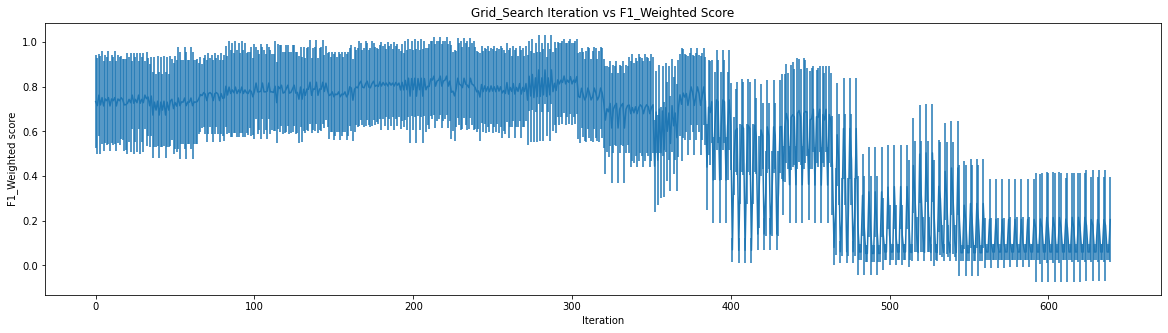

[(279, 0.8753333333333333), (283, 0.8753333333333333), (287, 0.8753333333333333), (275, 0.8548888888888888), (295, 0.8480000000000001)]
Best Parameters:  {'sgd_clf__alpha': 0.01, 'sgd_clf__loss': 'squared_hinge', 'sgd_clf__max_iter': 100, 'sgd_clf__penalty': 'None'}
Best Score:  0.8753333333333333


In [ ]:
grid_search = grid_search_eval(pipe_tuning, hype_params)

In [ ]:
grid_search.best_params_

{'sgd_clf__alpha': 0.01,
 'sgd_clf__loss': 'squared_hinge',
 'sgd_clf__max_iter': 100,
 'sgd_clf__penalty': 'None'}

In [ ]:
grid_search.best_score_

0.8753333333333333

# Final Modeling and Evaluation

In [ ]:
final_model = grid_search

# Confirming Model Results
scores = cross_val_score(final_model.best_estimator_, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [ 73.33333333 100.         100.         100.         100.
  60.         100.          72.         100.          72.
  80.         100.          86.66666667  80.          72.
 100.         100.          73.33333333  86.66666667  86.66666667
 100.         100.          41.66666667  66.66666667  75.
 100.         100.         100.         100.         100.        ]
Mean: 87.53333333333333
Standard Deviation: 0.15474614816004426


In [ ]:
pred_te = final_model.predict(X_test)

print(accuracy_score(y_test, pred_te) * 100)

86.11111111111111


In [ ]:
def plot_confusion_matrix(lab, pred):
  '''
  Creates and graphs the confusion matrix
  '''
  print(classification_report(lab, pred))

  plt.subplots(figsize=(15, 10))
  cm = confusion_matrix(lab, pred)
  g = sns.heatmap(cm,
                  cmap='Blues',
                  linecolor='Black',
                  linewidth=1,
                  annot=True,
                  fmt='d',
                  xticklabels=np.unique(le.inverse_transform(y_test)),
                  yticklabels=np.unique(le.inverse_transform(pred_te)))
  g.set_xlabel("True Label", fontsize=10)
  g.set_ylabel("Prediction Label", fontsize=10)

              precision    recall  f1-score   support

        CST1       0.50      1.00      0.67         1
        CST2       1.00      1.00      1.00         4
        CST3       0.75      0.60      0.67         5
        CST4       0.88      0.78      0.82         9
        CST5       0.88      1.00      0.93         7
        CST6       1.00      0.75      0.86         4
        CST7       0.86      1.00      0.92         6

    accuracy                           0.86        36
   macro avg       0.84      0.88      0.84        36
weighted avg       0.87      0.86      0.86        36



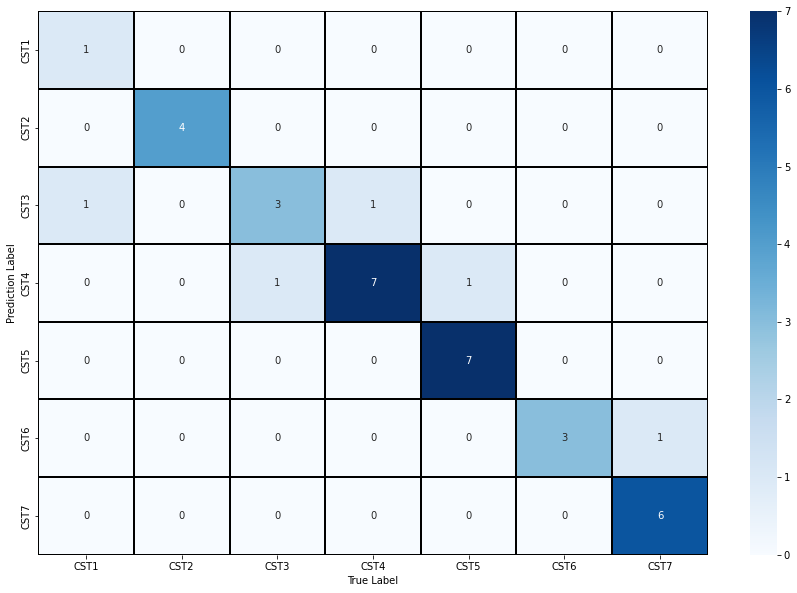

In [ ]:
plot_confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(pred_te))

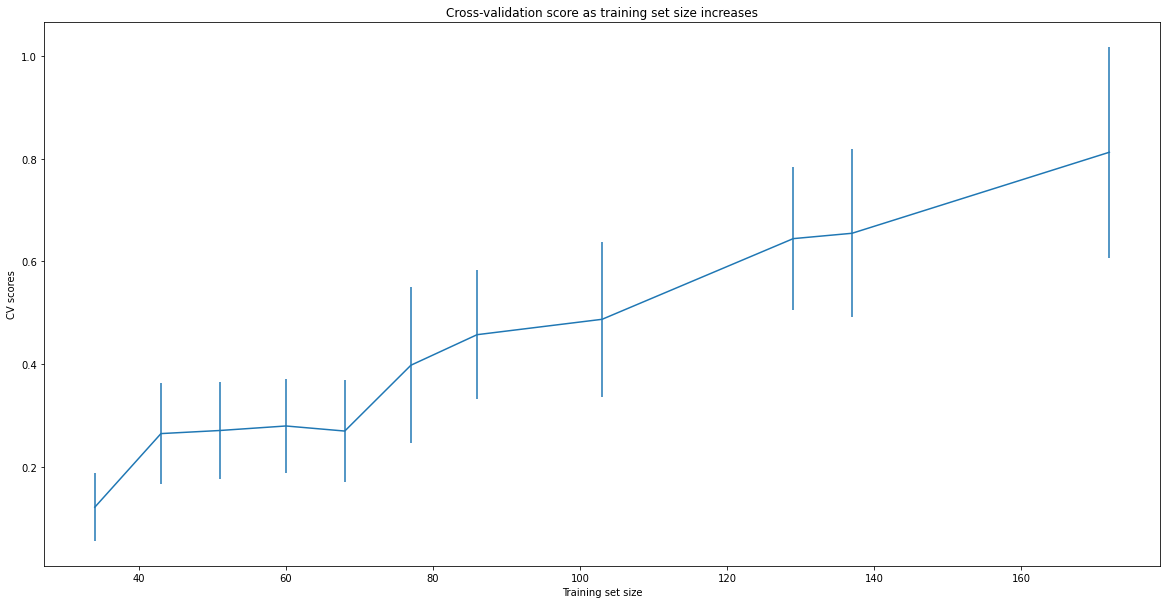

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(final_model.best_estimator_, X, encoded_y, train_sizes=fractions, scoring="f1_weighted", cv=30, n_jobs=-1, random_state=seed)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(20, 10))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');
plt.show()

# Saving Model

In [562]:
# Fit Final Model to Entire Training Data
final_model.best_estimator_.fit(X, encoded_y)

# Saving Best Model
best_model = final_model.best_estimator_
best_model.X_columns = [col for col in cluster_df.columns]

# Save the model as a pickle in a file
joblib.dump(best_model, os.path.join(file_path, "best_model.pkl"))

['/content/drive/MyDrive/Colab Notebooks/araclab interview problem/best_model.pkl']

In [564]:
Best_Model = joblib.load(os.path.join(file_path, "best_model.pkl"))

In [575]:
Best_Model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgd_clf',
                 SGDClassifier(alpha=0.01, class_weight='balanced',
                               loss='squared_hinge', max_iter=100,
                               penalty='None', random_state=123))])